# Лабораторная № 3
## Задание

- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
- Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
- Сравните метрики качества исходной и оптимальной моделей.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [ ]:
data=pd.read_csv('/housing.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mushroom_cleaned.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
num_zeros = data['class'].value_counts()[0]

num_ones = data['class'].value_counts()[1]

print("Количество строк с нулями:", num_zeros)
print("Количество строк с единицами:", num_ones)

Количество строк с нулями: 24360
Количество строк с единицами: 29675


In [ ]:
X=data.drop(['class'], axis=1)
y=data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Test Accuracy: 0.9888960858702692
Precision: 0.9889111616652961
Recall: 0.9888960858702692


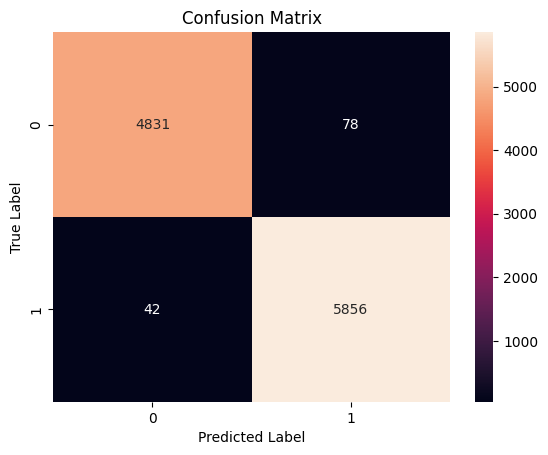

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=9)
model_KNN.fit(X_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_KNN)
print("Test Accuracy:", test_accuracy)

precision = precision_score(y_test, y_pred_KNN, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_KNN, average='micro')
print("Recall:", recall)

cm_KNN=confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm_KNN, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
n_range = np.array(range(1,21,1))
tuned_parameters = [{'n_neighbors': n_range}]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(model_KNN, tuned_parameters, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train_scaled, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.987416 using {'n_neighbors': 3}


In [ ]:
best_params = grid_result.best_params_
model_KNN = KNeighborsClassifier(**best_params)
model_KNN.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_KNN = model_KNN.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_KNN)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9887110206347738


In [ ]:
precision = precision_score(y_test, y_pred_KNN, average='weighted')
print("Precision:", precision)

Precision: 0.9887221477609186


In [ ]:
recall = recall_score(y_test, y_pred_KNN, average='micro')
print("Recall:", recall)

Recall: 0.9887110206347738


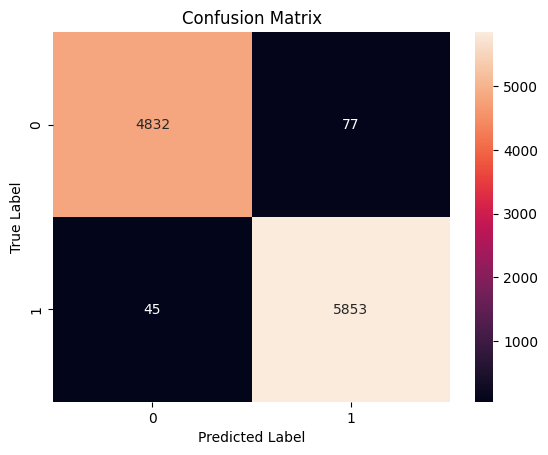

In [ ]:
cm_KNN=confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm_KNN, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
kf = KFold(n_splits=5)
random_search = RandomizedSearchCV(model_KNN, tuned_parameters, cv=kf, scoring='accuracy')
random_search.fit(X_train_scaled, y_train)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.987138 using {'n_neighbors': 5}
